## Final Project Submission

Please fill out:
* Student name: WINNIE ONDURU
* Student pace: PART TIME
* Scheduled project review date/time: 
* Instructor name: MS.D.MONGINA
* Blog post URL:


## MICROSOFTS NEW STUDIO PROJECT ANALYSIS

## Overview

## Business Understanding

## Data Understanding

## Data Analysis

In [38]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

### The First Dataset is 'bom.movie_gross.csv'

In [39]:
df_bom_movies_gross = pd.read_csv('bom.movie_gross.csv')
df_bom_movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [40]:
df_bom_movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [41]:
df_bom_movies_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

In [42]:
#I converted the 'foreign_gross' column to float by removing commas from the values using a list comprehension.
df_bom_movies_gross['foreign_gross'] = [float(str(x).replace(',', '')) for x in df_bom_movies_gross['foreign_gross']]
df_bom_movies_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [43]:
df_bom_movies_gross.isnull().sum()*100/len(df_bom_movies_gross)


title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [44]:
df_bom_movies_gross.dropna(axis = 0,inplace = True)
df_bom_movies_gross.isnull().sum()


title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

### The Second Dataset is 'tn.movie_budgets.csv'

In [45]:
df_movies_budgets = pd.read_csv('tn.movie_budgets.csv')
df_movies_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [46]:
#Lets begin by checking for null values
df_movies_budgets.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [47]:
#Now that there are no Null Values,how about any duplicates?
df_movies_budgets.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [51]:
df_movies_budgets['production_budget'] = df_movies_budgets['production_budget'].astype(str)
df_movies_budgets['domestic_gross'] = df_movies_budgets['domestic_gross'].astype(str)
df_movies_budgets['worldwide_gross'] = df_movies_budgets['worldwide_gross'].astype(str)
  
for r in ['production_budget', 'domestic_gross', 'worldwide_gross']:
    # Removes $ symbol and ,
    df_movies_budgets[r] = df_movies_budgets[r].str.replace('$', '').str.replace(',', '') 
    df_movies_budgets[r] = df_movies_budgets[r].astype(float) # Converts from object (str) to float
    # Divides by 100,000,000 to make it easier for the visualization
    df_movies_budgets[r] = (df_movies_budgets[r]).astype('int64') # Converts from float to int64
df_movies_budgets




C:\Users\USER\AppData\Local\Temp\ipykernel_5568\3403968726.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_movies_budgets[r] = df_movies_budgets[r].str.replace('$', '').str.replace(',', '')


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [14]:
df_movies_budgets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


### The Third Dataset is 'rt.movie_info.tsv'

In [52]:
df_movies_info = pd.read_csv('rt.movie_info.tsv',sep='\t')
df_movies_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [53]:
df_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [54]:
df_movies_info.drop(['synopsis','director','writer','theater_date','dvd_date','currency','box_office',],axis = 1,inplace = True)
df_movies_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1560 non-null   int64 
 1   rating   1557 non-null   object
 2   genre    1552 non-null   object
 3   runtime  1530 non-null   object
 4   studio   494 non-null    object
dtypes: int64(1), object(4)
memory usage: 61.1+ KB


In [55]:
#Then check for duplicates
df_movies_info.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1555    False
1556    False
1557    False
1558    False
1559    False
Length: 1560, dtype: bool

In [56]:
#Also check for Null Values in %
df_movies_info.isnull().sum()*100/len(df_movies_info)

id          0.000000
rating      0.192308
genre       0.512821
runtime     1.923077
studio     68.333333
dtype: float64

In [57]:
#First,lets work on Ratings Column
df_movies_info['rating'].fillna('NA', inplace = True)

#Then Genre Column
df_movies_info['genre'].fillna('NA', inplace = True)

#Finally for Runtime Column
# Remove units of measurement from runtime column                                 
df_movies_info['runtime'] = [float(str(x).replace('minutes', '')) for x in df_movies_info['runtime']]

# Convert runtime column to float
df_movies_info['runtime'] = pd.to_numeric(df_movies_info['runtime'], errors='coerce')

# Inpute missing values in runtime column with median value
median_runtime = df_movies_info['runtime'].median()
df_movies_info['runtime'].fillna(median_runtime, inplace=True)

# Lets Change runtime column back to string representation of minutes
df_movies_info['runtime'] = df_movies_info['runtime'].astype(int).astype(str) + ' minutes'


df_movies_info.isnull().sum()*100/len(df_movies_info)


id          0.000000
rating      0.000000
genre       0.000000
runtime     0.000000
studio     68.333333
dtype: float64

In [58]:
df_movies_info

,id,rating,genre,runtime,studio
0,1,R,Action and Adventure|Classics|Drama,104 minutes,NaN
1,3,R,Drama|Science Fiction and Fantasy,108 minutes,Entertainment One
2,5,R,Drama|Musical and Performing Arts,116 minutes,NaN
3,6,R,Drama|Mystery and Suspense,128 minutes,NaN
4,7,NR,Drama|Romance,200 minutes,NaN
...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,106 minutes,New Line Cinema
1556,1997,PG,Comedy|Science Fiction and Fantasy,88 minutes,Paramount Vantage
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,111 minutes,NaN
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101 minutes,NaN


### MERGING ALL DATASETS

In [59]:
df_dataset_one = pd.merge(df_bom_movies_gross, df_movies_info, on='studio')
df_dataset_one 

,title,studio,domestic_gross,foreign_gross,year,id,rating,genre,runtime
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
1,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
2,Clash of the Titans (2010),WB,163200000.0,330000000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
3,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
4,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes
...,...,...,...,...,...,...,...,...,...
360,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes
361,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes
362,It Comes At Night,A24,14000000.0,5300000.0,2017,1399,R,Drama|Horror,91 minutes
363,Hereditary,A24,44100000.0,35300000.0,2018,1399,R,Drama|Horror,91 minutes


In [60]:
df_movies_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [61]:
df_movies_budgets.rename(columns={'movie': 'title'},inplace = 'True')
df_movies_budgets

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [62]:
df_dataset_final = pd.merge(df_dataset_one,df_movies_budgets, on = 'title')
df_dataset_final

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,38,"Jul 16, 2010",160000000,292576195,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,84,"Nov 5, 2010",65000000,100539043,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,62,"Dec 17, 2010",80000000,100246011,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,64,"Jan 15, 2010",80000000,94835059,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,92,"Sep 17, 2010",37000000,92186262,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91 minutes,94,"Feb 19, 2016",3500000,25138705,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91 minutes,15,"Sep 30, 2016",3500000,663247,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes,53,"Nov 3, 2017",10000000,48958273,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes,100,"Dec 1, 2017",10000000,21120616,28717667


In [63]:
#Now lets drop one column for domestic_gross since they are two
df_dataset_final.drop(['domestic_gross_y'],axis = 1,inplace = True) 
df_dataset_final

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,38,"Jul 16, 2010",160000000,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,84,"Nov 5, 2010",65000000,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,62,"Dec 17, 2010",80000000,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,64,"Jan 15, 2010",80000000,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,92,"Sep 17, 2010",37000000,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91 minutes,94,"Feb 19, 2016",3500000,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91 minutes,15,"Sep 30, 2016",3500000,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes,53,"Nov 3, 2017",10000000,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes,100,"Dec 1, 2017",10000000,28717667


In [64]:
df_dataset_final.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [67]:
df_dataset_final.isnull().sum()*100/len(df_dataset_final)

title                0.0
studio               0.0
domestic_gross_x     0.0
foreign_gross        0.0
year                 0.0
id_x                 0.0
rating               0.0
genre                0.0
runtime              0.0
id_y                 0.0
release_date         0.0
production_budget    0.0
worldwide_gross      0.0
dtype: float64

In [68]:
#Lets drop the null values in column foreign gross because a small % and i dont think it might have an effect on my analysis.
df_dataset_final.dropna(axis = 0, inplace = True)
df_dataset_final.isnull().sum()*100/len(df_dataset_final)

title                0.0
studio               0.0
domestic_gross_x     0.0
foreign_gross        0.0
year                 0.0
id_x                 0.0
rating               0.0
genre                0.0
runtime              0.0
id_y                 0.0
release_date         0.0
production_budget    0.0
worldwide_gross      0.0
dtype: float64

In [69]:
df_dataset_final

,title,studio,domestic_gross_x,foreign_gross,year,id_x,rating,genre,runtime,id_y,release_date,production_budget,worldwide_gross
0,Inception,WB,292600000.0,535700000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,38,"Jul 16, 2010",160000000,835524642
1,Due Date,WB,100500000.0,111200000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,84,"Nov 5, 2010",65000000,211739043
2,Yogi Bear,WB,100200000.0,101300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,62,"Dec 17, 2010",80000000,204774690
3,The Book of Eli,WB,94800000.0,62300000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,64,"Jan 15, 2010",80000000,158750817
4,The Town,WB,92200000.0,61800000.0,2010,611,R,Drama|Mystery and Suspense,137 minutes,92,"Sep 17, 2010",37000000,152566881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,The Witch,A24,25100000.0,15300000.0,2016,1399,R,Drama|Horror,91 minutes,94,"Feb 19, 2016",3500000,40454520
246,American Honey,A24,663000.0,1200000.0,2016,1399,R,Drama|Horror,91 minutes,15,"Sep 30, 2016",3500000,2611750
247,Lady Bird,A24,49000000.0,30000000.0,2017,1399,R,Drama|Horror,91 minutes,53,"Nov 3, 2017",10000000,78610769
248,The Disaster Artist,A24,21100000.0,8700000.0,2017,1399,R,Drama|Horror,91 minutes,100,"Dec 1, 2017",10000000,28717667


In [70]:
df_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              250 non-null    object 
 1   studio             250 non-null    object 
 2   domestic_gross_x   250 non-null    float64
 3   foreign_gross      250 non-null    float64
 4   year               250 non-null    int64  
 5   id_x               250 non-null    int64  
 6   rating             250 non-null    object 
 7   genre              250 non-null    object 
 8   runtime            250 non-null    object 
 9   id_y               250 non-null    int64  
 10  release_date       250 non-null    object 
 11  production_budget  250 non-null    int64  
 12  worldwide_gross    250 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 27.3+ KB


## QUESTION ONE

### 1. How does the release month of a movie affect its gross values i.e Worldwide and Domestic?

[Text(7, 0, 'Jul'),
 Text(11, 0, 'Nov'),
 Text(12, 0, 'Dec'),
 Text(1, 0, 'Jan'),
 Text(9, 0, 'Sep'),
 Text(10, 0, 'Oct'),
 Text(2, 0, 'Feb'),
 Text(4, 0, 'Apr'),
 Text(6, 0, 'Jun'),
 Text(5, 0, 'May'),
 Text(3, 0, 'Mar'),
 Text(8, 0, 'Aug')]

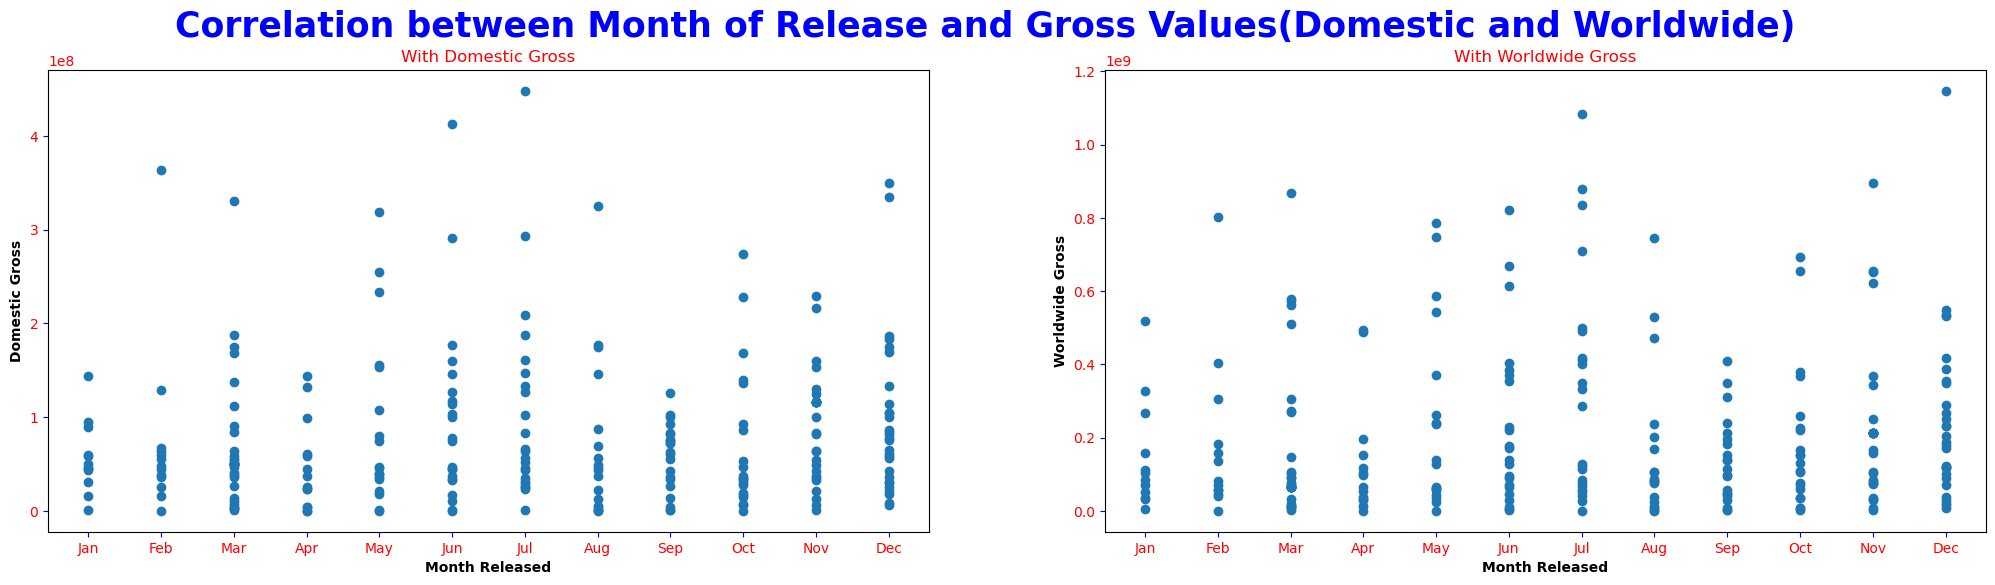

In [72]:
#Lets first change the release_date column to datetime format
df_dataset_final['release_date'] = pd.to_datetime(df_dataset_final['release_date'])
#create new variables month that contain the month information from the release_date column in the DataFrame, 
#in integer and abbreviated string formats
month = df_dataset_final['release_date'].dt.month
month_abbr = df_dataset_final['release_date'].dt.strftime('%b')

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(25,6))
fig.suptitle('Correlation between Month of Release and Gross Values(Domestic and Worldwide)',fontweight='bold',color = 'blue', size=25)

#Plotting ax1
ax1.scatter(month, df_dataset_final['domestic_gross_x'])
ax1.tick_params(color='blue', labelcolor='red')
ax1.set_title('With Domestic Gross', color ='red')
ax1.set_xlabel('Month Released',fontweight='bold')
ax1.set_ylabel('Domestic Gross',fontweight='bold')
ax1.set_xticks(month.unique())
ax1.set_xticklabels(month_abbr.unique())

#Plotting ax2
ax2.scatter(month, df_dataset_final['worldwide_gross'])
ax2.tick_params(color='blue', labelcolor='red')
ax2.set_title('With Worldwide Gross', color='red')
ax2.set_xlabel('Month Released',fontweight='bold')
ax2.set_ylabel('Worldwide Gross',fontweight='bold')
ax2.set_xticks(month.unique())
ax2.set_xticklabels(month_abbr.unique())


## QUESTION TWO

### 2.Which is the most popular genre ?

In [73]:
#Obtaining value counts
genre_counts = df_dataset_final['genre'].value_counts()
genre_counts


Drama|Mystery and Suspense                                              210
Comedy|Drama                                                             17
Drama|Horror                                                             11
Art House and International|Comedy|Drama|Musical and Performing Arts      2
Drama|Romance                                                             2
Action and Adventure|Drama                                                2
Drama|Horror|Mystery and Suspense                                         2
Drama                                                                     2
Action and Adventure|Mystery and Suspense                                 2
Name: genre, dtype: int64

Text(0.5, 1.0, 'Number of Movies by Genre')

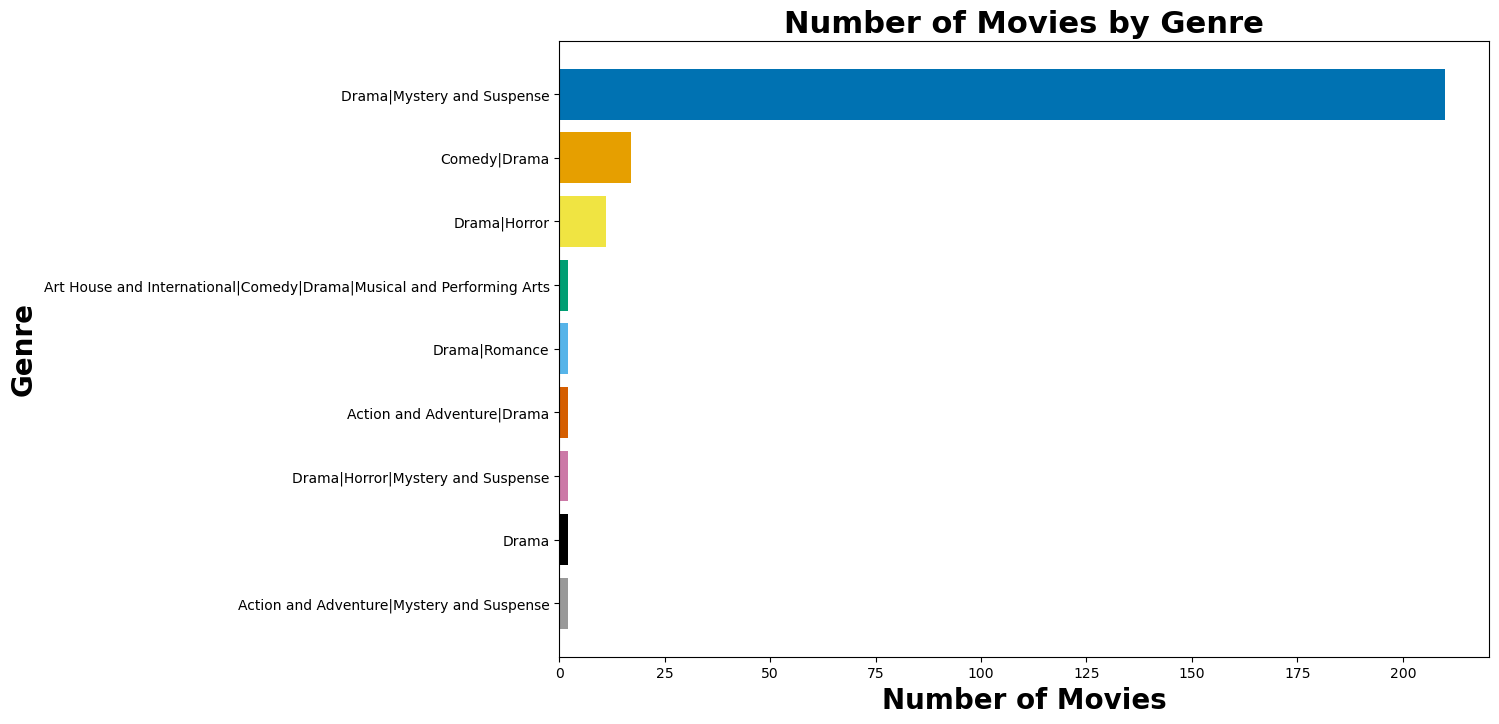

In [74]:
# Create a bar plot of the data
# Set the axis labels and title
genre_counts = dict(df_dataset_final['genre'].value_counts())
fig, ax = plt.subplots(figsize=(12,8))
ax.barh(list(genre_counts.keys()), genre_counts.values(),color=['#0072b2', '#e69f00', '#f0e442', '#009e73', '#56b4e9', '#d55e00', '#cc79a7', '#000000', '#999999', '#9999ff'])
ax.invert_yaxis()
plt.xlabel('Number of Movies',fontweight='bold',size = '20')
plt.ylabel('Genre',fontweight='bold',size = '20')
plt.title('Number of Movies by Genre',fontweight='bold',size = '22')

## QUESTION THREE

### 3.Which Studios are making the highest profit?

In [75]:
# First, i calculate the profit for each movie and storing the values in a new column profit
df_dataset_final['profit'] = df_dataset_final['worldwide_gross'] - df_dataset_final['production_budget']

# Then, group the movies by their respective studios and sum up the profits
studio_profit = df_dataset_final.groupby('studio')['profit'].sum()

# Finally, i sort the data by profit in descending order
studio_profit = studio_profit.sort_values(ascending=False)

# Print the resulting DataFrame
print(studio_profit)



studio
Fox    19054087780
WB     14038224007
MGM     1354914904
A24      249329992
IFC      156825818
Name: profit, dtype: int64


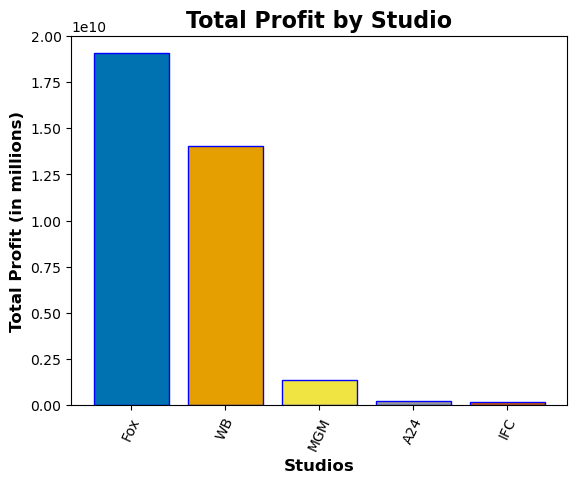

In [76]:
# Plot a bar chart of the studio profits
plt.bar(studio_profit.index, studio_profit.values,color=['#0072b2', '#e69f00', '#f0e442', '#999999', '#d55e00'], edgecolor='b')

# Add labels and title to the chart, and customize their appearance
plt.xlabel('Studios', fontsize=12, fontweight='bold')
plt.ylabel('Total Profit (in millions)', fontsize=12, fontweight='bold')
plt.title('Total Profit by Studio', fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=65)

# Display the chart
plt.show()                      

## RECOMENDATIONS

## NEXT STEPS

                                                ### END.
                                               ## THANK YOU.